# Problem: Lead Scoring Model

Selling something is not an easy task. A business might have many potential customers, commonly referred as leads, but not enough resources to cater them all. Even most of the leads won’t turn into actual bookings. So there is a need for a system that prioritises the leads, and sorts them on the basis of a score, referred to here as lead score. So whenever a new lead is generated, this system analyses the features of the lead and gives it a score that correlates with chances of it being converted into booking. Such ranking of potential customers not only helps in saving time but also helps in increasing the conversion rate by letting the sales team figure out what leads to spend time on.
Here you have a dataset of leads with their set of features and their status. You have to build a ML model that predicts the lead score as an OUTPUT on the basis of the INPUT set of features. This lead score will range from 0-100, so more the lead score means more chances of conversion of lead to WON.

* NOTE: The leads with STATUS other than ‘WON’ or ‘LOST’ can be dropped during training.
* NOTE: Treat all columns as CATEGORICAL columns
* NOTE: This '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' represents NaN and could be present in more than one column.

Steps should be:
1. Data Cleaning ( including Feature Selection)
2. Training ( on Y percent of data)
3. Testing ( on (100-Y) percent of data)
4. Evaluate the performance using metrics such as accuracy, precision, recall and F1-score.




# Importing data:

In [332]:
# importing library
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [267]:
df=pd.read_csv('/content/drive/MyDrive/uniacco project/Data_Science_Internship - Dump.csv')

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


In [269]:
df.head(2)

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...


In [270]:
df.shape

(46608, 16)

# This dataset appears to contain information about agents and their interactions with potential clients interested in renting accommodations. 
* Unnamed: 0: an index column
* Agent_id: unique identifier for each agent
* status: status of the interaction (LOST, WON, etc.)
* lost_reason: reason for losing the potential client
* budget: budget range of the potential client
* lease: duration of the lease
* movein: move-in date for the potential client
* source: identifier for the source of the lead
* source_city: city where the lead originated
* source_country: country where the lead originated
* utm_source: identifier for the source of the lead
* utm_medium: identifier for the medium of the lead (e.g. youtube ads, banner, etc.)
* des_city: city where the potential client is looking to rent
* des_country: country where the potential client is looking to rent
* room_type: type of room the potential client is looking for
* lead_id: unique identifier for each lead

# Data preprocessing:

In [271]:
# Drop the 'Unnamed: 0' and 'Agent_id' columns because they do not provide any useful information.

df = df.drop(['Unnamed: 0', 'Agent_id','lead_id'], axis=1)

as per assignment document given information,   **'9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0'** this formate values is NaN or null value. we will remove all the column of this value.but this columns also very important for our goal but unfortunetly this dtata doesnt any meaning as it is not clear so we will remove all the columns.

In [272]:
df = df.drop(['source', 'source_city', 'source_country','utm_source','utm_medium','des_city','des_country'], axis=1)

In [273]:
df.head(3)

,status,lost_reason,budget,lease,movein,room_type
0,LOST,Not responding,NaN,NaN,NaN,NaN
1,LOST,Low budget,NaN,NaN,NaN,NaN
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,Ensuite


In [274]:
df['status'].unique()

array(['LOST', 'WON', 'OPPORTUNITY', 'CONTACTED', 'PROCESSING',
       'IMPORTANT'], dtype=object)

I have to find maximum score of booking so our target variable will be 'status' column.
* lost: means compleately leave the booking.
* WON:  mean customer booked the hotel
* OPPORTUNITY: customer is excited to booking
* CONTACTED:   customer contacted for booking
* PROCESSING: customer is on the processing to booking
* IMPORTANT: customer marked the hotel as important for booking

Now i'll assign increasing  value from (0 to 5) as per customer intention towards booking. 

In [275]:
df=df.replace(to_replace=['LOST','PROCESSING','OPPORTUNITY','IMPORTANT','CONTACTED','WON'], value=[0,1,2,3,4,5])

In [276]:
df['status'].unique()

array([0, 5, 2, 4, 1, 3])

In [277]:
df.head(3)

,status,lost_reason,budget,lease,movein,room_type
0,0,Not responding,NaN,NaN,NaN,NaN
1,0,Low budget,NaN,NaN,NaN,NaN
2,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,Ensuite


# Data Analysis:

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status       46608 non-null  int64 
 1   lost_reason  43244 non-null  object
 2   budget       42908 non-null  object
 3   lease        44267 non-null  object
 4   movein       32970 non-null  object
 5   room_type    23061 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [279]:
# number of unique values
print(df['lost_reason'].nunique())
print(df['budget'].nunique())
print(df['lease'].nunique())
print(df['movein'].nunique())
print(df['room_type'].nunique())

30
1857
311
477
5


In [280]:
# checking number of null values of each columns
print(df['lost_reason'].isna().sum())
print(df['budget'].isna().sum())
print(df['lease'].isna().sum())
print(df['movein'].isna().sum())
print(df['room_type'].isna().sum())

3364
3700
2341
13638
23547


# Missing values handling of each columns:

In [281]:
df.head()

,status,lost_reason,budget,lease,movein,room_type
0,0,Not responding,NaN,NaN,NaN,NaN
1,0,Low budget,NaN,NaN,NaN,NaN
2,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,Ensuite
3,0,Low budget,0-0,0,NaN,NaN
4,0,Junk lead,NaN,NaN,NaN,NaN


### 'lost_reason' columns:

In [282]:
df["lost_reason"].isna().sum()

3364

In [283]:
df["lost_reason"].dtype

dtype('O')

In [284]:
# df["lost_reason"]=df["lost_reason"].astype('|S')

In [285]:
df["lost_reason"].dtype

dtype('O')

In [286]:
df["lost_reason"].nunique()

30

In [287]:
df["lost_reason"].value_counts().head(6)

Low availability               8892
Not responding                 7827
Not interested                 6449
Low budget                     5505
Wants private accommodation    2781
Short stay                     2264
Name: lost_reason, dtype: int64

In [288]:
df["lost_reason"] = df["lost_reason"].fillna('Not interested')

In [289]:
df["lost_reason"].isna().sum()

0

In [290]:
df["lost_reason"].value_counts().head(6)

Not interested                 9813
Low availability               8892
Not responding                 7827
Low budget                     5505
Wants private accommodation    2781
Short stay                     2264
Name: lost_reason, dtype: int64

### "movein" column:

In [291]:
df["movein"].isna().sum()

13638

In [292]:
df["movein"].dtype

dtype('O')

In [293]:
# changing seris object to datetime of "movein" column
df["movein"] = pd.to_datetime(df["movein"])

In [294]:
df['movein'].nunique()

477

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   status       46608 non-null  int64         
 1   lost_reason  46608 non-null  object        
 2   budget       42908 non-null  object        
 3   lease        44267 non-null  object        
 4   movein       32970 non-null  datetime64[ns]
 5   room_type    23061 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.1+ MB


In [296]:
# replacing null values with meadian values
df['movein'] = df['budget'].fillna(df['movein'].median())

In [297]:
df['movein'].isna().sum()

0

### "room_type" column:

In [298]:
df["room_type"].isna().sum()

23547

In [299]:
df["room_type"].unique()

array([nan, 'Ensuite', 'Entire Place', 'Studio', 'Twin-Studio',
       'Non-Ensuite'], dtype=object)

In [300]:
df["room_type"].value_counts()

Ensuite         12477
Studio           6383
Entire Place     4198
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

* "Ensuite" came maximum times so lets replace null values of this column with it.

In [301]:
df['room_type'] = df['room_type'].fillna("Ensuite")

In [302]:
df['room_type'].isna().sum()

0

### "budget" column:

In [303]:
df['budget'].isna().sum()

3700

In [304]:
df['budget'].nunique()

1857

In [305]:
df['budget'].value_counts().head(7)

£60 - £120 Per week     9862
£121 - £180 Per Week    8954
0-0                     5733
£181 - £240 Per Week    2171
100                     1516
150                     1088
£241 - £300 Per week     720
Name: budget, dtype: int64

* we should replace null witrh o zero money it will notr affect our feature and it has also more number of customer.

In [306]:
df['budget'] = df['budget'].fillna("0-0")

In [307]:
df['budget'].isna().sum()

0

### "lease" column:

In [308]:
df['lease'].isna().sum()

2341

In [309]:
df['lease'].nunique()

311

* we can remove all the null values rows because it has less number of row as compare to dataset column and it will not affect the data information

In [310]:
df= df.dropna(axis=0, subset=['lease'])

In [311]:
df['lease'].isna().sum()

0

In [312]:
df.isna().sum()

status         0
lost_reason    0
budget         0
lease          0
movein         0
room_type      0
dtype: int64

# ML model building:

### One-hot encode the categorical variables

In [313]:
df = pd.get_dummies(df)

In [316]:
df=df.loc[3:,:]

### Split the data into training and testing sets

In [318]:
from sklearn.model_selection import train_test_split
X = df.drop(['status'], axis=1)
y = df['status']


In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
X.head(3)

,lost_reason_Booked on campus accommodation,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,lost_reason_Junk lead,lost_reason_Junk lead/ Just Enquiring,...,movein_£90 - £140 Per week,movein_£90 pw,movein_£90- £140 Per week,movein_£900,movein_£98-120/week,room_type_Ensuite,room_type_Entire Place,room_type_Non-Ensuite,room_type_Studio,room_type_Twin-Studio
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [320]:
from sklearn.ensemble import RandomForestClassifier

In [321]:
# Train a Random Forest Classifier on the training data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [322]:
y_pred = rfc.predict(X_test)

## Accuracy score:

In [326]:
print('Accuracy score:', accuracy_score(y_test, y_pred))

Accuracy score: 0.9305398689857691


## Confusion matrix:

In [327]:
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Confusion matrix:
 [[8088    0    0    0    0  114]
 [   2    0    0    0    0    0]
 [  42    0    0    0    0    0]
 [   1    0    0    0    0    0]
 [   4    0    0    0    0    0]
 [ 452    0    0    0    0  151]]


Text(0.5, 1.0, 'Confusion matrix')

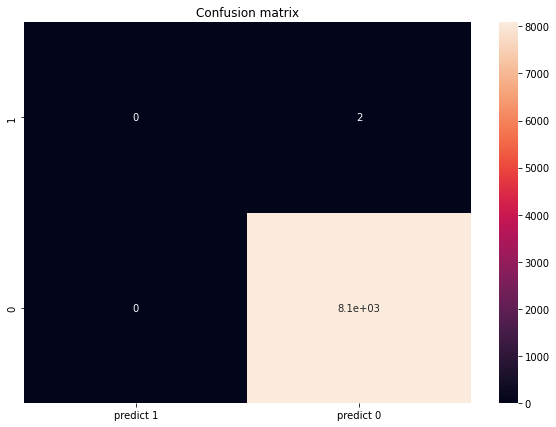

In [340]:
import seaborn as sns
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm=pd.DataFrame(cm, index= [i for i in ["1","0"]],columns=[i for i in ["predict 1","predict 0"]])
plt.figure(figsize=(10,7))
sns.heatmap(df_cm,annot=True)
plt.title('Confusion matrix')

## Classification report:

In [331]:
print('Classification report:\n', classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      8202
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.57      0.25      0.35       603

    accuracy                           0.93      8854
   macro avg       0.25      0.21      0.22      8854
weighted avg       0.91      0.93      0.92      8854



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
